## Lecture 12: Homework and exam review

### STAT598z: Intro. to computing for statistics


***




### Vinayak Rao

#### Department of Statistics, Purdue University

In [3]:
options(repr.plot.width=4, repr.plot.height=3)

### Homework 2A

In [4]:
trunc_norm <- function(mn, stdv, low, up, num ,sz ) {
  trnc <- numeric(num)
  count <- 0
  while(count < num) {
    nrm        <- rnorm(sz,mn,stdv)
    valid      <- (nrm > low) & (nrm < up)
    num_valid  <- sum(valid)
    lrange     <- count + 1
    urange     <- count+num_valid
     
    trnc[lrange:urange] <- nrm[valid]
    count <- urange
  }
  return(trnc[1:num])
}

### Homework 2B

In [ ]:
my_mat <- matrix(rnorm(60000,1),ncol=6)
my_mat[my_mat < 0] <- 0
prob_mat <- my_mat / rowSums(my_mat)


What about rows that are all negative?
+ Remove NaN s?
+ Add a small offset?
+ Remove them?

In [5]:
my_mat <- matrix(rnorm(60000),ncol=6)
my_mat[my_mat < 0] <- 0
my_norm <- rowSums(my_mat)
sel_row <- my_norm > 0
prob_mat <- my_mat[sel_row,] / my_norm[sel_row]

In [7]:
ent <- -rowSums(prob_mat * ifelse(prob_mat > 0, 
                                  log(prob_mat),0))

In [10]:
prob_mat[which.max(ent),]

[1] 0.1129196 0.2158891 0.1746902 0.1185286 0.2076395 0.1703330

Can do it without special functions, but be careful about floats

### Homework 3

In [18]:
library('ggplot2')
state_map <- map_data('state'); state_map$InfoValue <- NA
str(state_map)

'data.frame':	15537 obs. of  7 variables:
 $ long     : num  -87.5 -87.5 -87.5 -87.5 -87.6 ...
 $ lat      : num  30.4 30.4 30.4 30.3 30.3 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ subregion: chr  NA NA NA NA ...
 $ InfoValue: logi  NA NA NA NA NA NA ...


In [17]:
state_info <- as.data.frame(state.x77)
#str(state_info)
(head(state_info))

,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area
Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708
Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432
Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417
Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945
California,21198,5114,1.1,71.71,10.3,62.6,20,156361
Colorado,2541,4884,0.7,72.06,6.8,63.9,166,103766


In [19]:
for(nm in rownames(state_info)) { # Buggy!
  state_map$InfoValue[state_map$region == tolower(nm)] <-
    state_info$Murder[nm]
}
head(state_map)

long,lat,group,order,region,subregion,InfoValue
-87.46201,30.38968,1,1,alabama,NA,NA
-87.48493,30.37249,1,2,alabama,NA,NA
-87.52503,30.37249,1,3,alabama,NA,NA
-87.53076,30.33239,1,4,alabama,NA,NA
-87.57087,30.32665,1,5,alabama,NA,NA
-87.58806,30.32665,1,6,alabama,NA,NA


Confusing R quirk: selecting a column with `$` loses the rownames!

In [20]:
for(nm in rownames(state_info)) {
  state_map$InfoValue[state_map$region == tolower(nm)] <-
  state_info[nm, 'Murder']
}

In [21]:
head(state_map)

long,lat,group,order,region,subregion,InfoValue
-87.46201,30.38968,1,1,alabama,NA,15.1
-87.48493,30.37249,1,2,alabama,NA,15.1
-87.52503,30.37249,1,3,alabama,NA,15.1
-87.53076,30.33239,1,4,alabama,NA,15.1
-87.57087,30.32665,1,5,alabama,NA,15.1
-87.58806,30.32665,1,6,alabama,NA,15.1


Were all states considered?

In [27]:
head(state_map)

long,lat,group,order,region,subregion,InfoValue
-87.46201,30.38968,1,1,alabama,NA,15.1
-87.48493,30.37249,1,2,alabama,NA,15.1
-87.52503,30.37249,1,3,alabama,NA,15.1
-87.53076,30.33239,1,4,alabama,NA,15.1
-87.57087,30.32665,1,5,alabama,NA,15.1
-87.58806,30.32665,1,6,alabama,NA,15.1


Less efficient, less clean, but still valid
```
  state_info <- as.data.frame(state.x77)
  rownames(state_info) <- 
      tolower(rownames(state_info))
  for(rw in 1:nrow(state_map)) {
    rw_state <- state_map$region[rw]
    state_map$InfoValue[rw] 
       <- state_info[rw_state, 'Murder' ]
  }
  ```
Were all states covered? (Exercise)

Make functions for repeated operations

In [28]:
AddInfoValue <- function(info_type) {
  state_map <- map_data('state')
  state_map[,c( 'InfoValue', 'InfoType')] <- NA
  for(nm in rownames(state_info)) {
    rw_indx <- state_map$region == tolower(nm)
    state_map$InfoValue[rw_indx] <- state_info[nm,info_type]
    state_map$InfoType[rw_indx]  <- info_type
  }
  state_map <- state_map[!is.na(state_map$InfoValue),]
}

In [29]:
info_frame <- rbind(AddInfoValue( 'Life Exp'),
                    AddInfoValue('HS Grad' ))

In [31]:
head(info_frame)

long,lat,group,order,region,subregion,InfoValue,InfoType
-87.46201,30.38968,1,1,alabama,NA,69.05,Life Exp
-87.48493,30.37249,1,2,alabama,NA,69.05,Life Exp
-87.52503,30.37249,1,3,alabama,NA,69.05,Life Exp
-87.53076,30.33239,1,4,alabama,NA,69.05,Life Exp
-87.57087,30.32665,1,5,alabama,NA,69.05,Life Exp
-87.58806,30.32665,1,6,alabama,NA,69.05,Life Exp


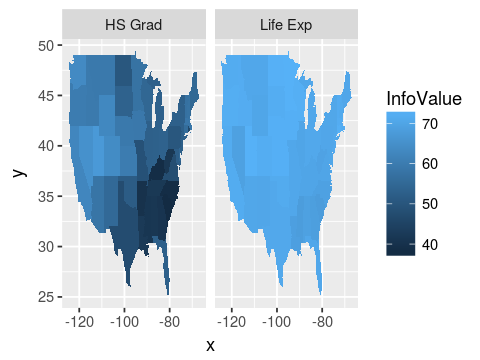

In [32]:
ggplot()+geom_map(map = info_frame, map_id=info_frame$region,
        data = info_frame, aes(fill=InfoValue)) +
expand_limits(x = info_frame$long, y = info_frame$lat) +
facet_grid(.~InfoType)

We want to add mean latitude and longitude

In [33]:
AddMeanLatLong <- function() {
  state_map  <- map_data('state')
  state_info <- as.data.frame(state.x77)
  state_info[,c('Lat', 'Long')] <- NA
  for(nm in rownames(state_info)) {
    rw_indx <- state_map$region == tolower(nm)
    state_info[nm, 'Lat']  <- mean(state_map$lat[rw_indx])
    state_info[nm, 'Long'] <- mean(state_map$long[rw_indx])
  }
  state_info <- state_info[!is.na(state_info$Lat),]
}

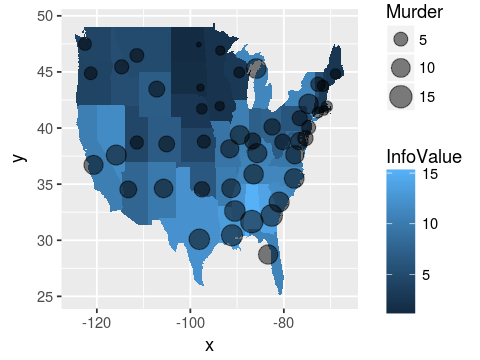

In [39]:
p <- ggplot() + geom_map(map = state_map, map_id=state_map$region,
             data = state_map, aes(fill=InfoValue)) +
             expand_limits(x = state_map$long, y = state_map$lat)
info_frame <- AddMeanLatLong()
p1 <- p + geom_point(data = info_frame, 
                     aes(x=Long,y=Lat,size=Murder),alpha=0.5)
p1

Maybe add one more function?

In [40]:
getMeanLatLong <- function(ip_map, state) {
# Expects lowercase states as input
  rw_indx <- ip_map$region == state
     c(Lat = mean(state_map$lat[rw_indx]),
       Long = mean(state_map$long[rw_indx]))
}
AddMeanLatLong <- function(ip_map) {
  state_info <- as.data.frame(state.x77)
  state_info[,c( 'Lat' , 'Long' )] <- NA
  for(nm in rownames(USArrests))
    state_info[nm, c( 'Lat' , 'Long' )] <-
      getMeanLatLong(ip_map, tolower(nm))
  state_info <- state_info[!is.na(state_info$Lat),]
}

### apply functions
In the final part I asked you to replace the for loop with sapply

```R
my_func <- function(mf_ip) {
# Stuff
}
my_arr <- rnorm(100)
new_arr <- array(0, length(my_arr))
for(i in 1:length(my_arr) {
new_arr[i] <- my_func(my_arr[i]) 
# For some function my_func
}
```

Cleaner:
```R
 new_arr <- sapply(my_arr, my_func)
 ```

### apply functions

Note: \*apply functions do not vectorize loops

They just hide them for convenience, clarity and to avoid bugs

When possible, vectorize code:

Bad:
``` R
my_arr <- 1:10
sapply(my_arr, sqrt)
```
Good:
``` R
my_arr <- 1:10
sqrt(my_arr) # Cleaner and faster
```

`lapply,sapply,vapply` etc: hard to remember which does what

`plyr` package provides simpler interface